In [5]:
!pip install yfinance --quiet

### Data Collection and Pre-processing
---

* Use Yahoo Bitcoin History
* Use USD Index Futures Historical Data
* Price History from 2015 to present

#### Look at video here for TS analysis - 
https://www.youtube.com/watch?v=_vQ0W_qXMxk&t=1157s&ab_channel=PyData 

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

%matplotlib inline


In [7]:
# Read BTC and USD Futures Index data into dataframes
# Download BTC data using yfinance
bc = yf.download('BTC-USD', start='2014-01-01')
usd = yf.download('DX-Y.NYB', start='2014-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
bc = bc[['Close', 'Volume']]
bc = bc.rename(columns={'Close':'BTC_Price'})
bc.head()

,BTC_Price,Volume
Date,,
2014-09-17,457.334015,21056800
2014-09-18,424.440002,34483200
2014-09-19,394.795990,37919700
2014-09-20,408.903992,36863600
2014-09-21,398.821014,26580100


In [9]:
usd = usd[['Close']]
usd = usd.rename(columns={'Close':'USD_Price'})
usd.head()

,USD_Price
Date,
2014-01-02,80.629997
2014-01-03,80.790001
2014-01-06,80.650002
2014-01-07,80.830002
2014-01-08,81.040001


In [10]:
bc.describe()

,BTC_Price,Volume
count,2883.000000,2.883000e+03
mean,12550.006480,1.558827e+10
std,16519.332835,1.987922e+10
min,178.102997,5.914570e+06
25%,641.351501,8.776045e+07
50%,6622.479980,6.049220e+09
75%,11788.608398,2.662429e+10
max,67566.828125,3.509679e+11


In [11]:
usd.describe()

,USD_Price
count,2167.000000
mean,94.452442
std,5.476820
min,79.139999
25%,92.570000
50%,95.500000
75%,97.615002
max,108.540001


In [12]:
print(bc.shape[0])
print(usd.shape[0])

2883
2167


In [13]:
# Merge the two dataframes by date
join = bc.merge(usd, left_index=True, right_index=True, how="left")
# Drop Nas
join.dropna(inplace=True)
join.head()

,BTC_Price,Volume,USD_Price
Date,,,
2014-09-17,457.334015,21056800,84.699997
2014-09-18,424.440002,34483200,84.320000
2014-09-19,394.795990,37919700,84.800003
2014-09-22,402.152008,24127600,84.669998
2014-09-23,435.790985,45099500,84.660004


In [14]:
# Merge the two dataframes by date
# Don't need this loop

# join = bc.copy()

# for date1 in join.index.values:
#     for date2 in usd.index.values:
#         if date1 == date2:
#             itemindex = np.where(usd.index == date2)[0][0]
#             val = usd.at[date2, "USD_Price"]
#             join.at[date1, "USD_Price"] = val

# join.head()

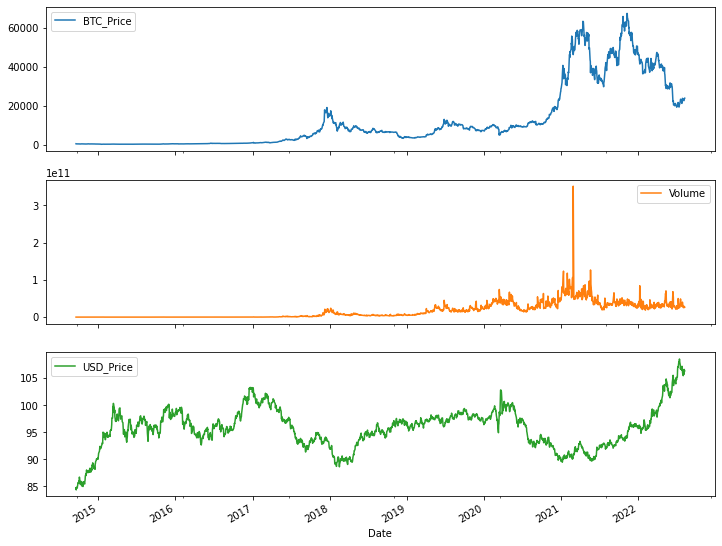

In [15]:
join.plot(subplots=True, figsize=(12,10))
plt.show()

### Deeper Dive into Bitcoin and USD price movements
---

In [16]:
def plotcharts(y, title, lags=None, figsize=(16, 10)):
    fig = plt.figure()
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0))
    hist_ax = plt.subplot2grid(layout, (0,1))
    acf_ax = plt.subplot2grid(layout, (1,0))
    pacf_ax = plt.subplot2grid(layout, (1,1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=14, fontweight="bold")
    y.plot(ax=hist_ax, kind="hist", bins=25)
    hist_ax.set_title("Histogram")
    sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
    sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    plt.tight_layout()
    return ts_ax, hist_ax, acf_ax, pacf_ax

In [17]:
series = join.copy()
series.iloc[1,:]

BTC_Price    4.244400e+02
Volume       3.448320e+07
USD_Price    8.432000e+01
Name: 2014-09-18 00:00:00, dtype: float64

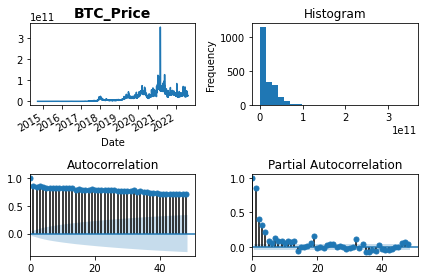

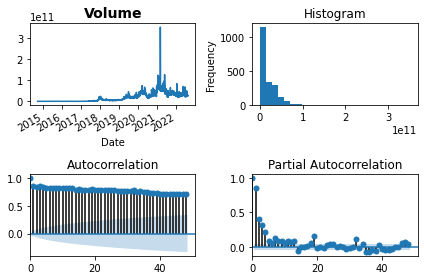

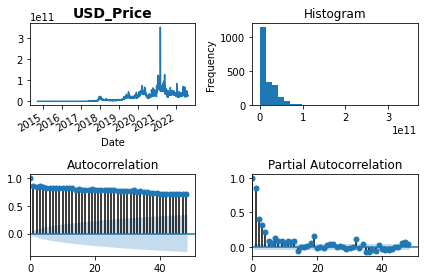

In [18]:
num_var = len(series.iloc[1,:])
for i in range(num_var):
    plotcharts(series.iloc[:,1].dropna(), title=series.columns[i], lags=48)

#### Normalization
--- 
Above time series are not stationary. Let's normalize and fix that

In [19]:
series

,BTC_Price,Volume,USD_Price
Date,,,
2014-09-17,457.334015,21056800,84.699997
2014-09-18,424.440002,34483200,84.320000
2014-09-19,394.795990,37919700,84.800003
2014-09-22,402.152008,24127600,84.669998
2014-09-23,435.790985,45099500,84.660004
...,...,...,...
2022-08-02,22978.117188,28389250717,106.239998
2022-08-03,22846.507812,26288169966,106.510002
2022-08-04,22630.957031,25120229769,105.690002


In [20]:
# Log transformation - converting data to a logarithmic scale
log = pd.DataFrame(np.log(series))
log

,BTC_Price,Volume,USD_Price
Date,,,
2014-09-17,6.125414,16.862734,4.439116
2014-09-18,6.050771,17.355983,4.434619
2014-09-19,5.978369,17.450981,4.440296
2014-09-22,5.996830,16.998867,4.438761
2014-09-23,6.077163,17.624382,4.438643
...,...,...,...
2022-08-02,10.042298,24.069276,4.665701
2022-08-03,10.036554,23.992385,4.668239
2022-08-04,10.027074,23.946939,4.660510


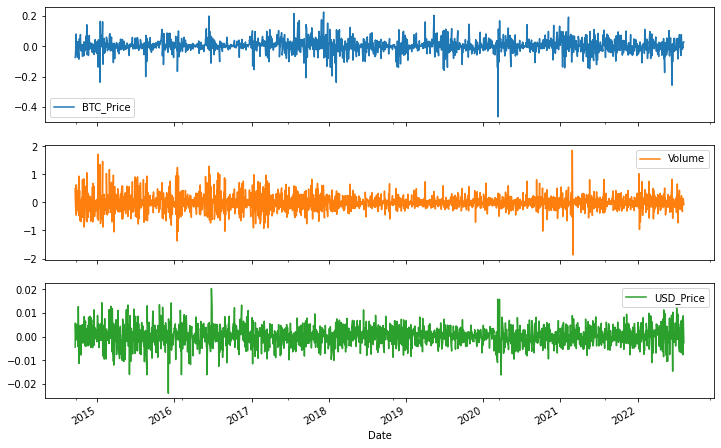

In [21]:
# Differencing log values
#1
log_diff = log.diff().dropna()
# 2
log_diff2 = log_diff.diff().dropna()
log_diff.plot(subplots=True, figsize=(12, 8))
plt.show()

In [22]:
# normalization

# import minmaxscaler
from sklearn.preprocessing import MinMaxScaler
# create minmaxscaler object
norm = MinMaxScaler()

# applying norm to dataframe
join_norm = pd.DataFrame(norm.fit_transform(log_diff), columns=log_diff.columns)
join_norm


,BTC_Price,Volume,USD_Price
0,0.565467,0.633542,0.439903
1,0.568717,0.526946,0.669500
2,0.700430,0.380507,0.506759
3,0.790119,0.668944,0.538722
4,0.631187,0.397944,0.645116
...,...,...,...
1983,0.652621,0.526608,0.709838
1984,0.665343,0.480939,0.598672
1985,0.659928,0.489355,0.366957
1986,0.715238,0.538863,0.739111


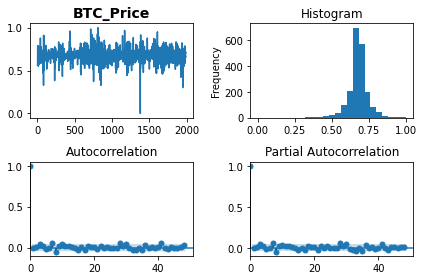

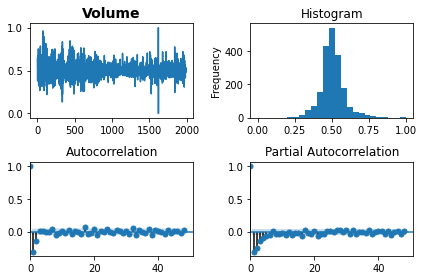

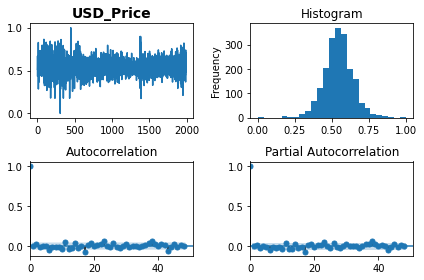

In [23]:
# Now plot the series, hist, acf and pacf again
num_var = len(join_norm.iloc[1,:])
for i in range(num_var):
    plotcharts(join_norm.iloc[:,i].dropna(), title=join_norm.columns[i], lags=48)

#### Check TS Stationarity
---

In [24]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag="AIC")
    print("1. ADF : ", dftest[0])
    print("2. p-value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("4. Num of Observations used for ADF regression and critical value calc: ", dftest[3])
    print("5. Critical values : ")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

ad_test(log_diff["BTC_Price"])
print("----------------------------------------------------")
ad_test(log_diff["Volume"])
print("----------------------------------------------------")
ad_test(log_diff["USD_Price"])
print("----------------------------------------------------")

1. ADF :  -15.422622914202503
2. p-value :  3.020570028636373e-28
3. Num of Lags :  7
4. Num of Observations used for ADF regression and critical value calc:  1980
5. Critical values : 
	 1% :  -3.433656968706682
	 5% :  -2.863000832624789
	 10% :  -2.567547686205489
----------------------------------------------------
1. ADF :  -12.903614593021436
2. p-value :  4.197577697896742e-24
3. Num of Lags :  20
4. Num of Observations used for ADF regression and critical value calc:  1967
5. Critical values : 
	 1% :  -3.4336788532475775
	 5% :  -2.8630104945933974
	 10% :  -2.567552830738709
----------------------------------------------------
1. ADF :  -12.320473246100581
2. p-value :  6.769010856061915e-23
3. Num of Lags :  16
4. Num of Observations used for ADF regression and critical value calc:  1971
5. Critical values : 
	 1% :  -3.4336720887549483
	 5% :  -2.863007508094813
	 10% :  -2.567551240570721
----------------------------------------------------


### Model 1: Vector Autoregressive (AR) Model
---

In [25]:
# Split the dataset into train and test datasets
n_obs = 7
train, test = log_diff[:-n_obs], log_diff[-n_obs:]
log_diff.head()

,BTC_Price,Volume,USD_Price
Date,,,
2014-09-18,-0.074643,0.493249,-0.004496
2014-09-19,-0.072402,0.094999,0.005676
2014-09-22,0.018461,-0.452114,-0.001534
2014-09-23,0.080333,0.625515,-0.000118
2014-09-24,-0.029306,-0.386966,0.004596


In [26]:
# Fitting the VAR model
from statsmodels.tsa.api import VAR

model = VAR(log_diff)
results = model.fit(maxlags=22, ic='aic')
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Aug, 2022
Time:                     17:09:22
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -19.4994
Nobs:                     1982.00    HQIC:                  -19.6011
Log likelihood:           11103.3    FPE:                2.89520e-09
AIC:                     -19.6602    Det(Omega_mle):     2.81351e-09
--------------------------------------------------------------------
Results for equation BTC_Price
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.001853         0.001047            1.770           0.077
L1.BTC_Price        -0.011242         0.022630           -0.497           0.619
L1.Volume            0.008303         0.003875            2.

In [27]:
results.k_ar

6

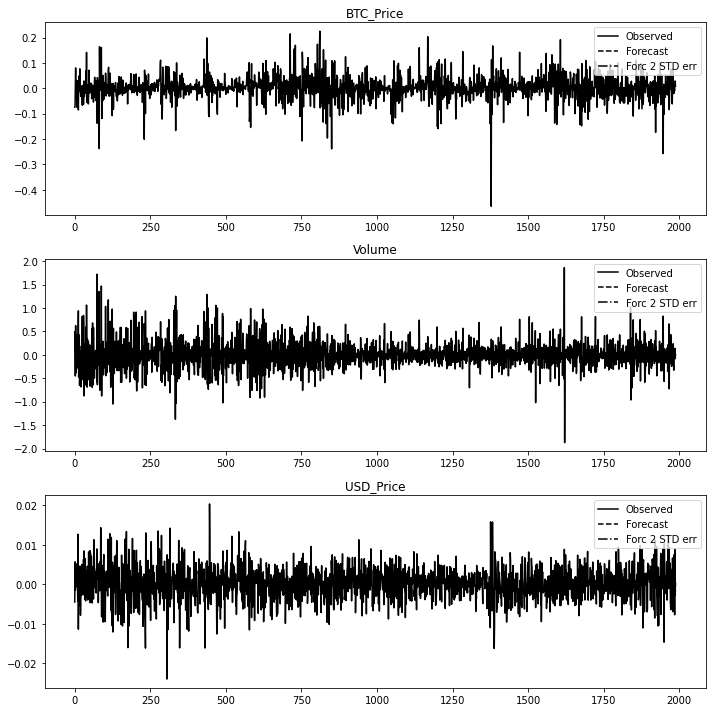

In [28]:
lag_order = results.k_ar
predicted = results.forecast(log_diff.values[-lag_order:],n_obs)
forecast = pd.DataFrame(predicted, index = log_diff.index[-n_obs:], columns = log_diff.columns)


# Plotting the Forecasted values
p1 = results.plot_forecast(1)
p1.tight_layout()

In [29]:
# Inverting the Differencing Transformation
def invert_transformation(df, df_forecast, second_diff):
    for col in df.columns:
        # Undo the 2nd Differencing
        if second_diff:
            df_forecast[str(col)] = (df[col].iloc[-1] - df[col].iloc[-2]) + df_forecast[str(col)].cumsum()
        # Undo the 1st Differencing
        df_forecast[str(col)] = df[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

forecast_values = invert_transformation(train, forecast, second_diff=False)
forecast_values.tail()

,BTC_Price,Volume,USD_Price
Date,,,
2022-08-02,0.046362,0.292563,-0.001093
2022-08-03,0.050276,0.286248,-0.000790
2022-08-04,0.050660,0.303733,-0.001041
2022-08-05,0.052489,0.314263,-0.000781
2022-08-08,0.054578,0.307780,-0.000685


In [30]:
\